In [1]:
import deepxde as dde
import numpy as np
from deepxde.backend import pytorch
import torch
import matplotlib.pyplot as plt
from SIRD_deepxde_class import SIRD_deepxde_net
from SIRD_deepxde_class import Plot

np.random.seed(0)

Using backend: pytorch



In [2]:
alpha_real = 0.2
beta_real = 0.05
gamma_real = 0.01

total  [2.10918900e+05 1.61564795e+03 4.04904713e+06 8.44379541e+05]
total  5105961.215454253


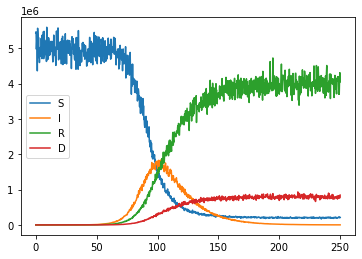

In [3]:
import ODE_SIR
solver = ODE_SIR.ODESolver()
t_synth, wsol_synth, N = solver.solve_SIRD(alpha_real, beta_real, gamma_real)
wsol_synth = solver.add_noise(wsol_synth, scale_pct=0.05)
solver.plot_SIRD(t_synth, wsol_synth)

In [4]:
max_timestep = 100
t_bool = t_synth < max_timestep
t = t_synth[t_bool]
wsol = wsol_synth[t_bool]
model = SIRD_deepxde_net(t, wsol)
model.init_model(print_every=1000)
model.train_model(iterations=12000)
alpha_nn, beta_nn, gamma_nn = model.get_predicted_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model.set_synthetic_data(t_synth, wsol_synth)
model.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000184 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [1.70e-04, 4.19e-02, 1.13e-02, 1.03e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 9.42e-01, 9.38e-01, 2.12e-01, 1.89e-01, 1.77e-01, 1.61e+00, 4.43e-01, 2.20e-01]    [1.70e-04, 4.19e-02, 1.13e-02, 1.03e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 9.42e-01, 9.38e-01, 2.12e-01, 1.89e-01, 1.77e-01, 1.61e+00, 4.43e-01, 2.20e-01]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [3.27e-05, 1.49e-06, 3.15e-06, 2.61e-07, 1.74e-07, 7.68e-08, 2.06e-07, 2.79e-07, 1.71e-03, 6.10e-05, 3.46e-05, 6.02e-06, 9.50e-05, 9.44e-06, 1.89e-05, 8.46e-08]    [3.27e-05, 1.49e-06, 3.15e-06, 2.61

In [5]:
max_timestep = 85
t_bool = t_synth < max_timestep
t = t_synth[t_bool]
wsol = wsol_synth[t_bool]
model85 = SIRD_deepxde_net(t, wsol)
model85.init_model(print_every=1000)
model85.train_model(iterations=12000)
alpha_nn, beta_nn, gamma_nn = model85.get_predicted_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model85.set_synthetic_data(t_synth, wsol_synth)
model85.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000157 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [7.15e-03, 3.46e-03, 8.72e-03, 5.43e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 6.03e-02, 1.61e-01, 1.04e+00, 2.68e-01, 1.84e-05, 2.80e-01, 9.64e-01, 2.37e-01]    [7.15e-03, 3.46e-03, 8.72e-03, 5.43e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 6.03e-02, 1.61e-01, 1.04e+00, 2.68e-01, 1.84e-05, 2.80e-01, 9.64e-01, 2.37e-01]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [2.81e-05, 3.40e-06, 1.07e-06, 2.69e-06, 8.12e-06, 2.40e-09, 1.20e-05, 2.58e-04, 2.59e-03, 1.77e-04, 4.02e-05, 1.61e-05, 2.97e-03, 1.05e-03, 1.33e-04, 3.60e-06]    [2.81e-05, 3.40e-06, 1.07e-06, 2.69

In [6]:
max_timestep = 75
t_bool = t_synth < max_timestep
t = t_synth[t_bool]
wsol = wsol_synth[t_bool]
model75 = SIRD_deepxde_net(t, wsol)
model75.init_model(print_every=1000)
model75.train_model(iterations=12000)
alpha_nn, beta_nn, gamma_nn = model75.get_predicted_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model75.set_synthetic_data(t_synth, wsol_synth)
model75.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000345 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [6.28e-04, 9.04e-03, 3.72e-03, 1.42e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 3.16e-01, 1.51e-01, 3.28e-01, 8.74e-01, 1.83e-01, 9.05e-02, 4.01e-01, 8.41e-01]    [6.28e-04, 9.04e-03, 3.72e-03, 1.42e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 3.16e-01, 1.51e-01, 3.28e-01, 8.74e-01, 1.83e-01, 9.05e-02, 4.01e-01, 8.41e-01]    []  
0 [1.00e-01, 1.00e-01, 1.00e-01]
1000      [4.14e-05, 3.71e-06, 6.13e-07, 1.63e-06, 4.92e-07, 1.95e-06, 1.28e-06, 4.65e-07, 2.41e-03, 2.51e-04, 2.54e-05, 1.68e-05, 5.20e-04, 2.30e-04, 4.04e-05, 9.29e-10]    [4.14e-05, 3.71e-06, 6.13e-07, 1.63

# plot

In [7]:
values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model85 = Plot(model85, values_to_plot=values_to_plot)
plot_model75 = Plot(model75, values_to_plot=values_to_plot)

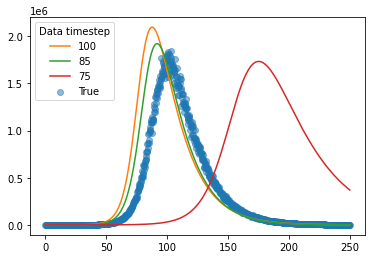

In [8]:
fig, ax = plt.subplots()
line = ax.scatter(plot_model.model.t_nn_synth, plot_model.model.wsol_synth[:,1], color=plot_model.colors[0], label='True',alpha=0.5)
line = ax.plot(plot_model.model.t_synth, plot_model.model.wsol_nn_synth[:,1], color=plot_model.colors[1], label=100)
line = ax.plot(plot_model85.model.t_synth, plot_model85.model.wsol_nn_synth[:,1], color=plot_model85.colors[2], label=85)
line = ax.plot(plot_model75.model.t_synth, plot_model75.model.wsol_nn_synth[:,1], color=plot_model75.colors[3], label=75)
ax.legend(title='Data timestep')